In [2]:
#First run:$pip install tf-explain, to import pre-trained models

#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

In [7]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)#Summary of Xception Model
print(model.summary)

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7f441d756d10>>


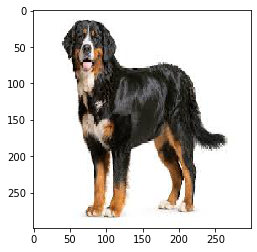

In [9]:
#loading and preprocessing dog image
IMAGE_PATH='../docs/Images/dog.jpeg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)#view the image
plt.imshow(img/255.)

In [10]:

import requests

#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

imgnet_map={v[1]:k for k, v in imgnet_map.items()}

#make model predictions
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)

[[('n02107908', 'Appenzeller', 0.39379266),
  ('n02107683', 'Bernese_mountain_dog', 0.20415406),
  ('n02108000', 'EntleBucher', 0.17183791),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.056646515),
  ('n02108551', 'Tibetan_mastiff', 0.0037044403)]]

In [11]:
#With inception3
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'

model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

Using TensorFlow backend.


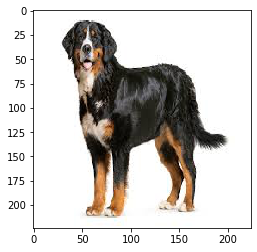

In [12]:
#loading and preprocessing dog image
IMAGE_PATH='../docs/Images/dog.jpeg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(224,224))
img=tf.keras.preprocessing.image.img_to_array(img)#view the image
plt.imshow(img/255.)

In [14]:
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

imgnet_map={v[1]:k for k, v in imgnet_map.items()}

#make model predictions
img=tf.keras.applications.inception_v3.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)

[[('n02107908', 'Appenzeller', 0.5402869),
  ('n02107683', 'Bernese_mountain_dog', 0.44719645),
  ('n02108000', 'EntleBucher', 0.008376215),
  ('n02101006', 'Gordon_setter', 0.0024782838),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.0016260953)]]